In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train_copy.csv', index_col=0)
df.shape

(1460, 80)

The data has many features which may cause overfitting in the model. To combat this the following may be necessary:
- dimensionality reduction
- algorithms which handle multiple features well
- feature selection

## Target Variable

<bound method Artist.set of <matplotlib.axes._subplots.AxesSubplot object at 0x000002A4EF994248>>

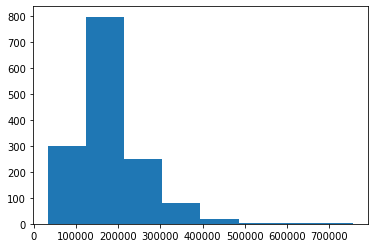

In [3]:
target = df['SalePrice']

fig1, ax1 = plt.subplots(1, 1)
ax1.hist(x=target, bins=8, edgecolor='none')
ax1.set_facecolor((1, 1, 1))
ax1.set


The majority of the houses are priced between $100-200 thousand, and the data is skew right

In [4]:
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
df.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


Group data into smaller dataframes based on column similarities

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd
Id,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006


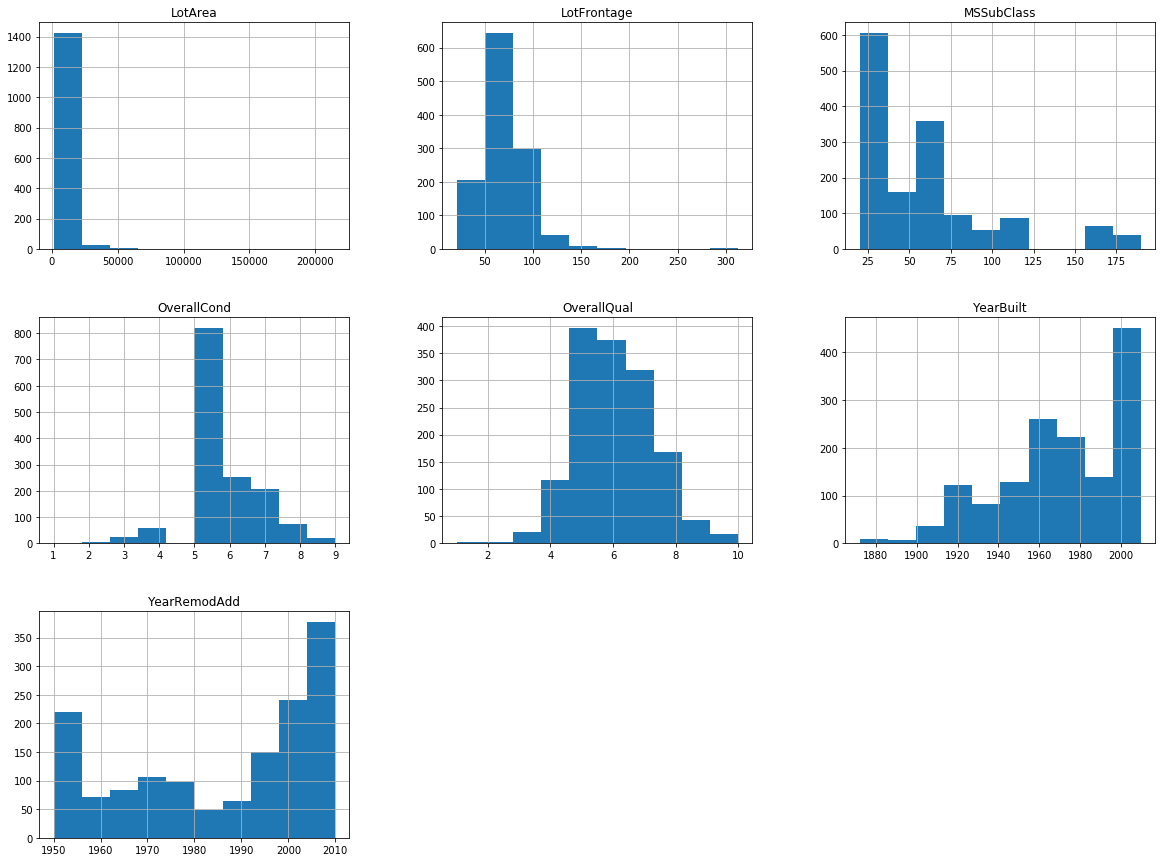

In [6]:
df_gen = df.iloc[:, 0:20] #general atrributes
df_gen.hist(figsize=(20, 15))
df_gen

MSSubClass: Identifies the type of dwelling involved in the sale.	 [Nominal]

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale. [Nominal]
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property [Numerical]

LotArea: Lot size in square feet [Numerical]

Street: Type of road access to property [Nominal]

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property [Nominal]

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property [Ordinal]

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property [Nominal]

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available [Nominal]
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration [Nominal]

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property [Ordinal]
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits [Nominal]

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
       
[ADD MAP ZIPCODE TO NEIGHBORHOODS SO GENERALIZABLE]
			
Condition1: Proximity to various conditions [Nominal]
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present) [Nominal]
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling [Nominal]
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling [Nominal]
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house [Ordinal]

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house [Ordinal]

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date [Numerical]

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions) [Numerical]


### Usefulness/Useless Features

**Useful**
- Lot Area

**Gray Area**


**Not Useful**
- Condition1/Condition2: Describe proximity to certain locations, however certain locations are specific to the Ames region and not generalizable to a housing model. In addition, if a house has more than 2 values i.e. is within proximity of more than 2 locations then it is unclear what priority values are recorded as there are only two spots in Condition1 and Condition2.


In [7]:
df_ext = df.iloc[:, 20:29] #exterior attributes
df_ext

,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation
Id,,,,,,,,,
1,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc
2,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock
3,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc
4,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil
5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc
...,...,...,...,...,...,...,...,...,...
1456,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc
1457,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock
1458,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone


RoofStyle: Type of roof [Nominal]

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material [Nominal]

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house [Nominal]

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material) [Nominal]

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type [Nominal]

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet [Numerical]

ExterQual: Evaluates the quality of the material on the exterior [Ordinal]
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior [Ordinal]
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation [Nominal]
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

In [8]:
df_bsmt = df.iloc[:, 29:38]
df_bsmt

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,
1,Gd,TA,No,GLQ,706,Unf,0,150,856
2,Gd,TA,Gd,ALQ,978,Unf,0,284,1262
3,Gd,TA,Mn,GLQ,486,Unf,0,434,920
4,TA,Gd,No,ALQ,216,Unf,0,540,756
5,Gd,TA,Av,GLQ,655,Unf,0,490,1145
...,...,...,...,...,...,...,...,...,...
1456,Gd,TA,No,Unf,0,Unf,0,953,953
1457,Gd,TA,No,ALQ,790,Rec,163,589,1542
1458,TA,Gd,No,GLQ,275,Unf,0,877,1152


BsmtQual: Evaluates the height of the basement [Ordinal]

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement [Ordinal]

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls [Ordinal]

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area [Ordinal]

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet [Numerical]

BsmtFinType2: Rating of basement finished area (if multiple types) [Ordinal]

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet [Numerical]

BsmtUnfSF: Unfinished square feet of basement area [Numerical]

TotalBsmtSF: Total square feet of basement area [Numerical]


In [1]:
df_util = df.iloc[:, 38:42]
df_util

NameError: name 'df' is not defined

Heating: Type of heating [Nominal]
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition [Ordinal]

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning [Nominal]

       N	No
       Y	Yes
		
Electrical: Electrical system [Nominal]

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [10]:
df_introoms = df.iloc[:, 42:57]
df_introoms

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu
Id,,,,,,,,,,,,,,,
1,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN
2,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA
3,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA
4,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd
5,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA
1457,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA
1458,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd


1stFlrSF: First Floor square feet [Numerical]
 
2ndFlrSF: Second floor square feet [Numerical]

LowQualFinSF: Low quality finished square feet (all floors) [Numerical]

GrLivArea: Above grade (ground) living area square feet [Numerical]

BsmtFullBath: Basement full bathrooms [Numerical]

BsmtHalfBath: Basement half bathrooms [Numerical]

FullBath: Full bathrooms above grade [Numerical]

HalfBath: Half baths above grade [Numerical]

Bedroom: Bedrooms above grade (does NOT include basement bedrooms) [Numerical]

Kitchen: Kitchens above grade [Numerical]

KitchenQual: Kitchen quality [Ordinal]

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) [Numerical]

Functional: Home functionality (Assume typical unless deductions are warranted) [Ordinal]

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces [Numerical]

FireplaceQu: Fireplace quality [Ordinal]

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [11]:
df_garage = df.iloc[:, 57:65]
df_garage

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive
Id,,,,,,,,
1,Attchd,2003.0,RFn,2,548,TA,TA,Y
2,Attchd,1976.0,RFn,2,460,TA,TA,Y
3,Attchd,2001.0,RFn,2,608,TA,TA,Y
4,Detchd,1998.0,Unf,3,642,TA,TA,Y
5,Attchd,2000.0,RFn,3,836,TA,TA,Y
...,...,...,...,...,...,...,...,...
1456,Attchd,1999.0,RFn,2,460,TA,TA,Y
1457,Attchd,1978.0,Unf,2,500,TA,TA,Y
1458,Attchd,1941.0,RFn,1,252,TA,TA,Y


GarageType: Garage location [Ordinal]
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built [Numerical]
		
GarageFinish: Interior finish of the garage [Ordinal]

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity [Numerical]

GarageArea: Size of garage in square feet [Numerical]

GarageQual: Garage quality [Ordinal]

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition [Ordinal]

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
       
PavedDrive: Paved driveway [Ordinal]

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

In [12]:
df_out = df.iloc[:, 65:73]
df_out

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence
Id,,,,,,,,
1,0,61,0,0,0,0,NaN,NaN
2,298,0,0,0,0,0,NaN,NaN
3,0,42,0,0,0,0,NaN,NaN
4,0,35,272,0,0,0,NaN,NaN
5,192,84,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...
1456,0,40,0,0,0,0,NaN,NaN
1457,349,0,0,0,0,0,NaN,MnPrv
1458,0,60,0,0,0,0,NaN,GdPrv


WoodDeckSF: Wood deck area in square feet [Numerical]

OpenPorchSF: Open porch area in square feet [Numerical]

EnclosedPorch: Enclosed porch area in square feet [Numerical]

3SsnPorch: Three season porch area in square feet [Numerical]

ScreenPorch: Screen porch area in square feet [Numerical]

PoolArea: Pool area in square feet [Numerical]

PoolQC: Pool quality [Ordinal]
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality [Ordinal] 
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

In [13]:
df_misc = df.iloc[:, 73:75]
df_misc

,MiscFeature,MiscVal
Id,,
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
5,NaN,0
...,...,...
1456,NaN,0
1457,NaN,0
1458,Shed,2500


MiscFeature: Miscellaneous feature not covered in other categories [Nominal]
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature [Numerical]

In [14]:
df_gen2 = df.iloc[:, 76:80]
df_gen2

,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,
1,2008,WD,Normal,208500
2,2007,WD,Normal,181500
3,2008,WD,Normal,223500
4,2006,WD,Abnorml,140000
5,2008,WD,Normal,250000
...,...,...,...,...
1456,2007,WD,Normal,175000
1457,2010,WD,Normal,210000
1458,2010,WD,Normal,266500


MoSold: Month Sold (MM) [Numerical]

YrSold: Year Sold (YYYY) [Numerical]

SaleType: Type of sale [Nominal]
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale [Nominal]

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [15]:
#pd.plotting.scatter_matrix(df)

## Missing Values

In [17]:
nan_counts = df.isna().sum()
nan_data = nan_counts.where(missing_vals > 0).dropna()
nan_data, missing_vals.sum()

NameError: name 'missing_vals' is not defined

The data set has 6,965 missing values. Features that have missing values in similar categories such as basement and garage related categories appear to be missing approximately the same number of values.

In [18]:
(nan_data/df.shape[0]).plot('bar')

NameError: name 'nan_data' is not defined

Alley, Pool, Fence, and MiscFeature all have approximately 100% missing values. This implies that most houses did not have these features, or they were not recorded successfully.

### Feature Usefulness Criteria

- Generality: Is this feature specific to Ames or can it be recorded for any house?
- % Missing: How much of the data for this feature is missing, and is it intentional or due to bad data recording?


## Essential Features

Essential Features:

- Location
- Year Built
- bedrooms
- baths
- Lot Area
- heating



- Roof material
- garage
- garage # cars
- garage sqft (z)
- basement
- basement sqft
- utilities (z)
- yearremodadd
- pool presence
- fence presence
- porch presence
- deck presence
- Exterior 1st+2nd materials
- Total rooms = total rooms above grade + basement

In [19]:
df['Bathroom'] = df['BsmtFullBath'] + 1/2 * df['BsmtHalfBath'] + df['FullBath'] + 1/2 * df['HalfBath']

essential_features = ['YearBuilt', 'LotArea', 'Heating', 'BedroomAbvGr', 'Bathroom']
df_ef1 = df[essential_features]
df_ef1

,YearBuilt,LotArea,Heating,BedroomAbvGr,Bathroom
Id,,,,,
1,2003,8450,GasA,3,3.5
2,1976,9600,GasA,3,2.5
3,2001,11250,GasA,3,3.5
4,1915,9550,GasA,3,2.0
5,2000,14260,GasA,4,3.5
...,...,...,...,...,...
1456,1999,7917,GasA,3,2.5
1457,1978,13175,GasA,3,3.0
1458,1941,9042,GasA,4,2.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A4F0D33388>,
      dtype=object)

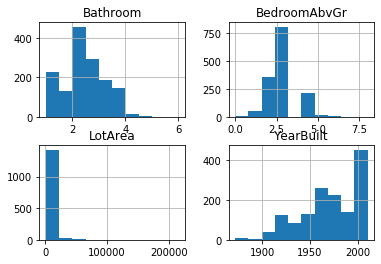

In [39]:
df_ef1.hist()

BedroomAbvGr records all bedrooms not in the basement. In the model we will assume that houses have no basement bedrooms, and BedroomAbvGr is equal to the number of bedrooms in a house.

Text(0.5, 1.0, 'Heating Counts')

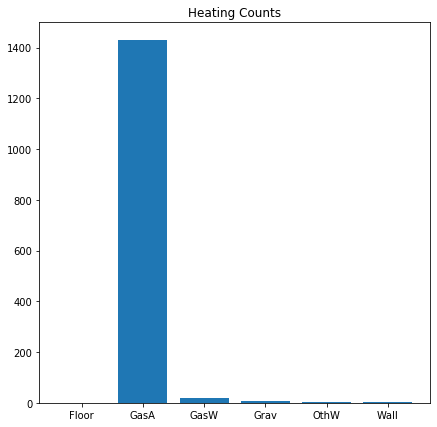

In [40]:
heating_count = df_ef1.groupby(['Heating']).count()

fig4, ax4 = plt.subplots(1, 1)
fig4.set_size_inches(7, 7)
plt.bar(heating_count.index, heating_count.iloc[:, 0])
plt.title("Heating Counts")

Heating: Type of heating [Nominal]
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
       
Our only categorical variable is heating type. We see the primary form of heating is with GasW, or forced warm air furnace, where gas is used to heat air which is propelled into rooms. GasW is the same except steam or water is used instead of gas.